Group 1, general question:

Goodwin Oscillators model circadian clocks. The model takes the form
$$ X' = \alpha_1\frac{K^N}{K^N + Z^N} - \gamma_1X$$
$$ Y' = \alpha_1X-\gamma_2Y $$
$$ Z' = \alpha_3Y - \gamma_3Z$$

(a) Implement the oscillator by solving the ODEs for the values in the paper by Gonze and Ruoff, Fig. 2. Show the trajectories for all three species.

Based on the graphs in Fig. 2, we appear to have $X_0 = 0.01$ and $Y_0 = 0.1$. It was determined through trial and error that an appropriate starting value for $Z$ with these $X_0$ and $Y_0$ values is $Z_0 = 4$.

In [123]:
# Set parameters according to Gonze and Ruoff 2020
alpha1 = 5; alpha2 = 5; alpha3 = 5; 
gamma1 = 0.5; gamma2 = 0.5; gamma3 = 0.5
K = 1; n = 10


In [124]:
# Implement numerical solution of ODEs and individual graph
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def clock(numTimeSteps, dt, x, y, z, alpha1, gamma1, alpha2, gamma2, alpha3, gamma3, K, n):
    
    # initialize
    X = np.zeros(numTimeSteps); Y = np.zeros(numTimeSteps); Z = np.zeros(numTimeSteps)
    
    for i in range(numTimeSteps):
        # record values
        X[i] = x; Y[i] = y; Z[i] = z
        
        # update variable sizes
        x += alpha1*(K**n/(K**n+z**n))-gamma1*x
        y += alpha2*x - gamma2*y
        z += alpha3*y - gamma3*z
        
    return X,Y,Z


def makeFigure(numTimeSteps,dt,x,y,z,alpha1,gamma1,alpha2,gamma2,alpha3,gamma3,K,n):
    X,Y,Z = clock(numTimeSteps, dt, x, y, z, alpha1, gamma1, alpha2, gamma2, alpha3, gamma3, K, n)

    timeline = np.linspace(0,numTimeSteps*dt, num = numTimeSteps)

    plt.plot(timeline, X, label = "X       " + str(x))
    plt.plot(timeline, Y, label = "Y       " + str(y))
    plt.plot(timeline, Z, label = "Z       " + str(int(z)))
    plt.legend(frameon = False, fontsize = 14,bbox_to_anchor=(1.001, 1), loc = 'upper left', title = r"                               Initial values")

    plt.xlabel("time", fontsize = 14)
    plt.xticks(ticks = [0,.002,.004,.006,.008], fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title("Hill coefficient n = " + str(n))
    sns.despine()
    
    return X,Y,Z,timeline

(c) Describe the negative auto-regulation intuitively. What is the main negative auto-regulation term? Where does the delay come from and why is it important? 

It appears that the minimums for all three species coincide. However, the maximums for $X$ and $Y$ coincide with eachother and precede the maximum for $Z$.

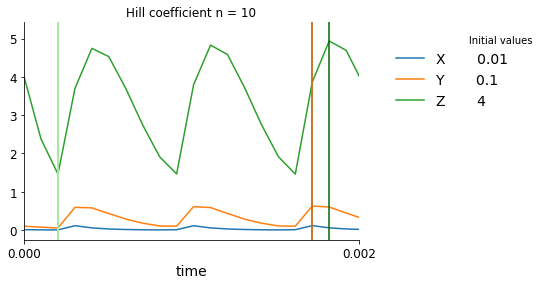

In [126]:
numTimeSteps = 80; dt = .0001
x = .01; y = .1; z = 4
n = 10
X,Y,Z,timeline = makeFigure(numTimeSteps,dt,x,y,z,alpha1,gamma1,alpha2,gamma2,alpha3,gamma3,K,n)
plt.xlim(0,.002)

# Plot vertical lines at the max and min for each species. Mins are lighter than the horizontal plotline;
# Maxs are darker. All three mins overlie eachother, so only the lightgreen line is visible.
# The max line for Y (darkorange) overlies the max line for X (lightblue), so only the max line
# for Y is visible.
plt.axvline(x = timeline[np.where(X == min(X[0:19]))], color = 'lightblue')
plt.axvline(x = timeline[np.where(X == max(X[0:19]))],color = 'darkblue')
plt.axvline(x = timeline[np.where(Y == min(Y[0:19]))], color = 'peachpuff')
plt.axvline(x = timeline[np.where(Y == max(Y[0:19]))], color = 'darkorange')
plt.axvline(x = timeline[np.where(Z == min(Z[0:19]))],color = 'lightgreen')
plt.axvline(x = timeline[np.where(Z == max(Z[0:19]))],color = 'darkgreen')

(d) Change the Hill coefficient, $n$, to a value smaller than $8$. What happens to the oscillations? Why do you think this happens?

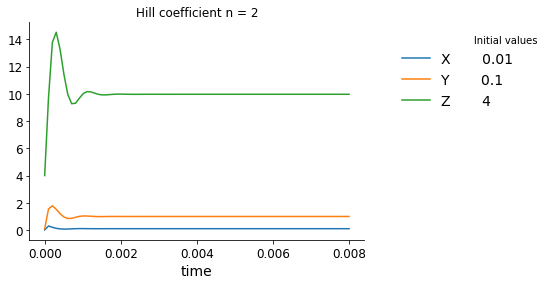

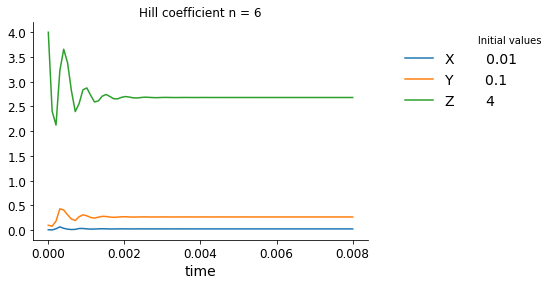

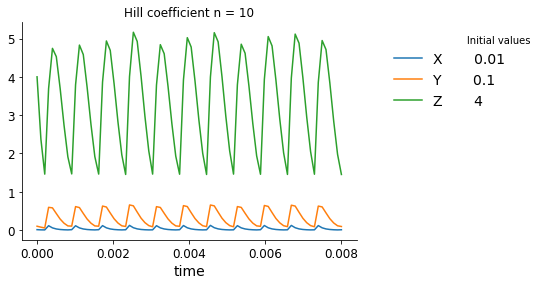

In [127]:
n_list = [2,6,10]; z = 4

#f,axes = plt.subplots(len(n_list),len(z_list),figsize=(len(z_list)*3,3))

for n in n_list:
    plt.figure()
    makeFigure(numTimeSteps,dt,x,y,z,alpha1,gamma1,alpha2,gamma2,alpha3,gamma3,K,n)

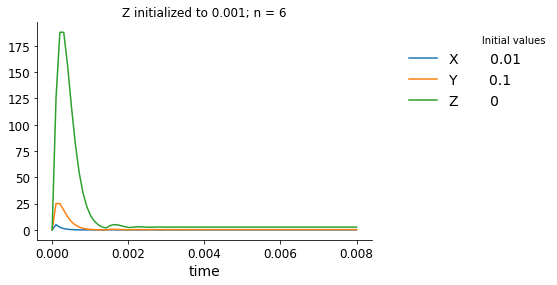

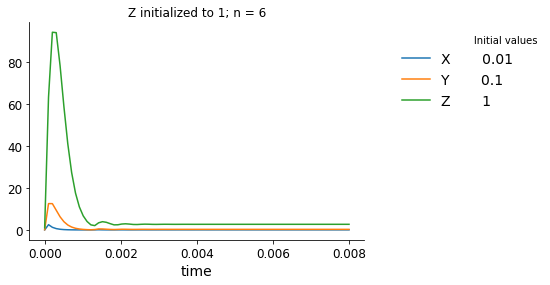

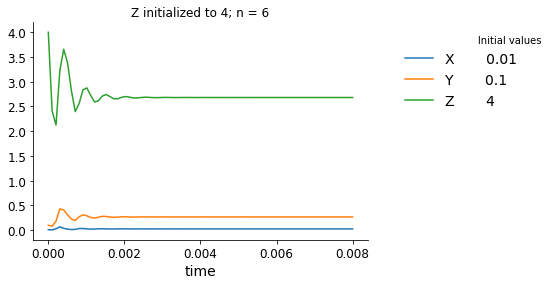

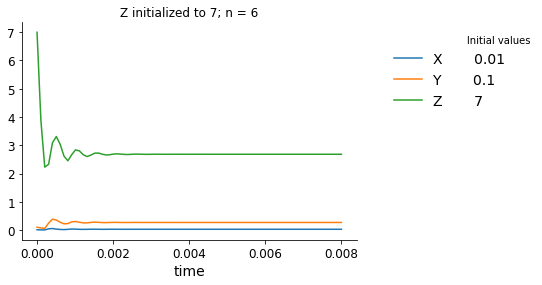

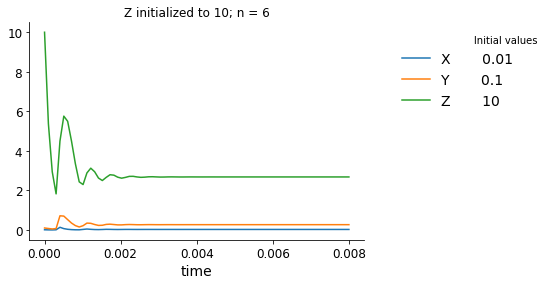

In [128]:
z_list = (.001,1,4,7,10)
n = 6
for z in z_list:
    plt.figure()
    makeFigure(numTimeSteps,dt,x,y,z,alpha1,gamma1,alpha2,gamma2,alpha3,gamma3,K,n)
    plt.title("Z initialized to " + str(z) + "; n = " + str(int(n)))